# 笔记

## 概括(AI 生成+自己完善)

本教程详细介绍了 PyTorch 中用于数据处理与加载的两个核心原语：`torch.utils.data.Dataset` 和 `torch.utils.data.DataLoader`。教程首先演示了如何加载和使用 TorchVision 提供的预构建数据集 (以 FashionMNIST 为例)，包括数据的迭代和可视化。接着，教程重点阐述了如何通过继承 `Dataset` 类来创建自定义数据集，这需要实现 `__init__`、`__len__` 和 `__getitem__` 三个关键方法，并展示了如何从本地文件系统（如包含图像的目录和 CSV 标注文件）读取数据。最后，教程说明了如何使用 `DataLoader` 来封装 `Dataset`，以便高效地按批次 (batch) 加载数据，并支持打乱 (shuffle) 等功能，为模型训练做好数据准备。

## 关键函数、语法(自己总结+AI 优化)

- `torch.utils.data.Dataset`: (在 `quickstart_tutorial.ipynb` 中已有涉及，此处补充更多关于自定义数据集的内容)
    - 自定义数据集时，除了 `__len__` 和 `__getitem__`，构造函数 `__init__` 通常用于进行一次性的设置，例如加载标注文件、指定数据目录、初始化数据转换等。
    - `__getitem__(self, idx)`: 此方法的核心任务是根据索引 `idx` 加载并返回数据集中的**单个样本**，通常包括从磁盘读取数据（如图像）、应用必要的数据转换 (transformations)，并返回处理后的数据样本及其对应的标签。
- `torch.randint(low=0, high, size, *, generator=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)`: 生成一个在 `[low, high)` 区间内均匀分布的随机整数张量。
    - `low` (可选，默认值为 0): 随机整数的下界 (包含)。
    - `high`: 随机整数的上界 (不包含)。
    - `size`: 定义输出张量形状的元组。
    - 在本教程中，`torch.randint(len(training_data), size=(1,)).item()` 用于从数据集中随机选择一个样本的索引，其中`size=(1,)` 表示生成一个包含*一个元素*的张量，`.item()` 将单元素张量转换为 Python 数字。
- `matplotlib.pyplot`:
    - `plt.figure(figsize=(width, height))`: 创建一个新的图形窗口，可以指定图形的大小。
    - `figure.add_subplot(rows, cols, index)`: 在图形窗口中添加一个子图。
    - `plt.title(title_string)`: 设置子图的标题。
    - `plt.axis("off")`: 关闭子图的坐标轴显示。
    - `plt.imshow(image_data, cmap=None)`: 显示图像数据。`cmap="gray"` 用于以灰度模式显示图像。
    - `plt.show()`: 显示所有创建的图形。
- `os.path.join(path, *paths)`: (Python 内置模块 `os` 的函数) 智能地拼接一个或多个路径部分，会使用适合当前操作系统的路径分隔符。
- `pandas.read_csv(filepath_or_buffer, ...)`:用于读取 CSV (逗号分隔值) 文件到 Pandas DataFrame 中。DataFrame 是一种二维的、大小可变的、通常是异构的表格数据结构。
- `DataFrame.iloc[row_indexer, column_indexer]`: (Pandas DataFrame 的属性) 基于整数位置的索引方法，用于选择 DataFrame 中的行和列。
    - `self.img_labels.iloc[idx, 0]` 获取第 `idx` 行、第 0 列（通常是文件名）的值。
    - `self.img_labels.iloc[idx, 1]` 获取第 `idx` 行、第 1 列（通常是标签）的值。
- `torchvision.io.read_image(path: str, mode: torchvision.io.image.ImageReadMode = ImageReadMode.UNCHANGED) -> torch.Tensor`:
    - 从指定的图像文件路径读取图像，并将其解码为一个 PyTorch 张量。
    - `path`: 图像文件的路径。
    - `mode` (可选): 指定读取图像的模式，例如颜色通道的顺序和数量。默认是 `UNCHANGED`。
    - 返回的张量通常形状为 `(C, H, W)` (Channels, Height, Width) 或 `(H, W)` (仅一个通道，为灰度图)。

## 提问与解答(自己提问+AI 回答)

- **问题1 ("Creating a Custom Dataset for your files" 部分中对 `transform` 和 `target_transform` 的使用):**
  `CustomImageDataset` 类接受 `transform` 和 `target_transform` 作为初始化参数。
    1.  对于图像数据，`transform` 参数的典型用途是什么？能否列举一些 `torchvision.transforms` 模块中常见的图像变换操作？
    2.  `target_transform` 参数对于标签数据的作用是什么？在哪些场景下会使用到？
    3.  为什么通常推荐在 `Dataset` 的 `__getitem__` 方法中动态应用这些变换，而不是在创建 `Dataset` 之前一次性预处理完所有数据？

  - **解答:**
    1.  **`transform` 的用途及示例 (针对图像数据):**
        `transform` 主要用于对输入的图像数据进行预处理和数据增强 (data augmentation)。
        -   **预处理**确保图像数据符合模型输入的要求，例如：
            -   `transforms.ToTensor()`: 将 PIL 图像或 NumPy `ndarray` 转换为 PyTorch 张量，并将像素值从 `[0, 255]` 范围归一化到 `[0.0, 1.0]`。
            -   `transforms.Normalize(mean, std)`: 用给定的均值 (mean) 和标准差 (std) 对张量图像进行标准化，这有助于模型训练的稳定性和收敛速度。
            -   `transforms.Resize(size)`: 将输入图像调整到指定的大小。
        -   **数据增强**通过对训练图像进行随机变换来增加训练数据的多样性，有助于提高模型的泛化能力，减少过拟合。常见的增强操作包括：
            -   `transforms.RandomResizedCrop(size)`: 随机裁剪图像并调整到指定大小。
            -   `transforms.RandomHorizontalFlip(p=0.5)`: 以概率 `p` 水平翻转图像。
            -   `transforms.RandomRotation(degrees)`: 在 `(-degrees, +degrees)` 范围内随机旋转图像。
            -   `transforms.ColorJitter(brightness, contrast, saturation, hue)`: 随机改变图像的亮度、对比度、饱和度和色调。

    2.  **`target_transform` 的用途 (针对标签数据):**
        `target_transform` 用于对标签数据进行预处理或转换。虽然在简单的分类任务中可能不常用 (标签通常是整数)，但在以下场景中可能非常有用：
        -   **格式转换**: 例如，将字符串类型的标签转换为整数索引，或者将整数标签转换为独热编码 (one-hot encoding) 向量。
        -   **复杂标签处理**: 在目标检测任务中，标签可能是边界框坐标，`target_transform` 可以用来对这些坐标进行归一化或调整。在分割任务中，标签可能是掩码图像，也可能需要转换。
        -   **自定义逻辑**: 使用 `transforms.Lambda(lambda y: ...)` 可以方便地应用任何自定义的标签转换逻辑。

    3.  **在 `__getitem__` 中应用变换的原因:**
        -   **内存效率**: 对于大型数据集，如果预先进行数据增强并存储所有增强后的样本，会极大地增加存储空间的占用。在 `__getitem__` 中按需转换可以避免这个问题。
        -   **随机性与多样性**: 对于随机的数据增强操作 (如随机裁剪、随机翻转)，在每个 epoch 的每次迭代中从 `__getitem__` 获取数据时动态应用，可以确保模型在不同的 epoch 看到略微不同的数据版本，这比一次性生成固定的增强数据集更有利于模型的学习和泛化。
        -   **灵活性**: 可以方便地为训练集、验证集和测试集定义不同的变换流程。例如，通常只对训练集进行数据增强，而验证集和测试集只进行必要的预处理 (如 `ToTensor`, `Normalize`)。

        参考资料:
        -   PyTorch `torchvision.transforms` 文档: [https://pytorch.org/vision/stable/transforms.html](https://pytorch.org/vision/stable/transforms.html)

- **问题2 (关于"Preparing your data for training with DataLoaders" 部分):**
  教程展示了 `DataLoader` 如何封装 `Dataset` 以进行批处理和打乱。`DataLoader` 还有一个名为 `collate_fn` 的参数。
    1.  `collate_fn` 在 `DataLoader` 中的作用是什么？默认的 `collate_fn` 是如何工作的？
    2.  在什么情况下，我们需要提供一个自定义的 `collate_fn`？能否举例说明一个典型的使用场景？

  - **解答:**
    1.  **`collate_fn` 的作用及默认行为:**
        `collate_fn` (collate function，整理函数) 的主要作用是将一个批次 (batch) 的样本（这些样本由 `Dataset` 的 `__getitem__` 方法返回，通常是一个样本列表）聚合成一个单独的批次数据，以便输入到模型中。
        -   `DataLoader` 从 `Dataset` 中获取单个样本，并将这些样本组成一个列表。
        -   然后，这个样本列表会传递给 `collate_fn`。
        -   `collate_fn` 负责将这些单独的样本“整理”或“堆叠”成一个或多个批次张量。
        **默认的 `collate_fn` (`torch.utils.data.default_collate`)** 通常能很好地处理以下情况：
        -   如果 `__getitem__` 返回的是 NumPy 数组或 Python 数值，它们会被转换为 PyTorch 张量。
        -   如果 `__getitem__` 返回的是一个张量序列（例如 `(image_tensor, label_tensor)`），默认的 `collate_fn` 会尝试将这些张量沿着新的批次维度 (维度0) 进行堆叠 (`torch.stack`)。例如，如果 `batch_size` 是 64，并且每个样本的图像是 `(C, H, W)`，标签是标量，那么 `collate_fn` 会输出一个形状为 `(64, C, H, W)` 的图像批次张量和一个形状为 `(64,)` 的标签批次张量。

    2.  **自定义 `collate_fn` 的场景及示例:**
        当默认的 `collate_fn` 无法正确处理 `Dataset` 返回的样本结构时，就需要提供自定义的 `collate_fn`。常见场景包括：
        -   **样本包含不同大小的序列 (Padding)**:
            -   例如，在自然语言处理 (NLP) 中，一个批次内的句子（表示为词索引序列）长度可能不同。模型通常需要固定长度的输入。自定义 `collate_fn` 可以对这些序列进行填充 (padding)，使它们在批次内达到相同的长度（通常是该批次中最长序列的长度）。
            -   **示例**: `__getitem__` 返回 `(sentence_tensor, label)`。自定义 `collate_fn` 会接收一个列表 `[(sentence1_tensor, label1), (sentence2_tensor, label2), ...]`，然后对所有 `sentence_tensor` 进行填充，并将它们堆叠成一个批次，同时堆叠标签。
        -   **处理非张量数据类型**:
            -   如果 `__getitem__` 返回的样本中包含不能直接转换为张量或不应被堆叠的数据 (如文件名、原始文本、复杂的嵌套结构)，自定义 `collate_fn` 可以决定如何处理这些数据（例如，将它们收集到列表中，或者忽略它们）。
        -   **特殊的数据结构**:
            -   当 `__getitem__` 返回的是字典或其他复杂数据结构，并且需要特定的方式来组合这些结构成批次时。
        -   **目标检测中的边界框**:
            -   在目标检测任务中，每张图片可能有不同数量的边界框。自定义 `collate_fn` 需要处理这种可变数量的目标，并将其整理成适合模型输入的格式。

        通过自定义 `collate_fn`，我们可以灵活地控制数据从单个样本到批次数据的转换过程，以适应各种复杂的数据类型和模型输入要求。

        参考资料:
        -   PyTorch `torch.utils.data.DataLoader` 文档 (搜索 `collate_fn`): [https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)
        -   PyTorch 论坛和教程中关于自定义 `collate_fn` 的讨论，例如处理序列填充的场景。


[Learn the Basics](intro.html) \|\|
[Quickstart](quickstart_tutorial.html) \|\|
[Tensors](tensorqs_tutorial.html) \|\| **Datasets & DataLoaders** \|\|
[Transforms](transforms_tutorial.html) \|\| [Build
Model](buildmodel_tutorial.html) \|\|
[Autograd](autogradqs_tutorial.html) \|\|
[Optimization](optimization_tutorial.html) \|\| [Save & Load
Model](saveloadrun_tutorial.html)

Datasets & DataLoaders
======================


Code for processing data samples can get messy and hard to maintain; we
ideally want our dataset code to be decoupled from our model training
code for better readability and modularity. PyTorch provides two data
primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset`
that allow you to use pre-loaded datasets as well as your own data.
`Dataset` stores the samples and their corresponding labels, and
`DataLoader` wraps an iterable around the `Dataset` to enable easy
access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such
as FashionMNIST) that subclass `torch.utils.data.Dataset` and implement
functions specific to the particular data. They can be used to prototype
and benchmark your model. You can find them here: [Image
Datasets](https://pytorch.org/vision/stable/datasets.html), [Text
Datasets](https://pytorch.org/text/stable/datasets.html), and [Audio
Datasets](https://pytorch.org/audio/stable/datasets.html)


Loading a Dataset
=================

Here is an example of how to load the
[Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/)
dataset from TorchVision. Fashion-MNIST is a dataset of Zalando's
article images consisting of 60,000 training examples and 10,000 test
examples. Each example comprises a 28×28 grayscale image and an
associated label from one of 10 classes.

We load the [FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) with the following parameters:

:   -   `root` is the path where the train/test data is stored,
    -   `train` specifies training or test dataset,
    -   `download=True` downloads the data from the internet if it\'s
        not available at `root`.
    -   `transform` and `target_transform` specify the feature and label
        transformations


In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Iterating and Visualizing the Dataset
=====================================

We can index `Datasets` manually like a list: `training_data[index]`. We
use `matplotlib` to visualize some samples in our training data.


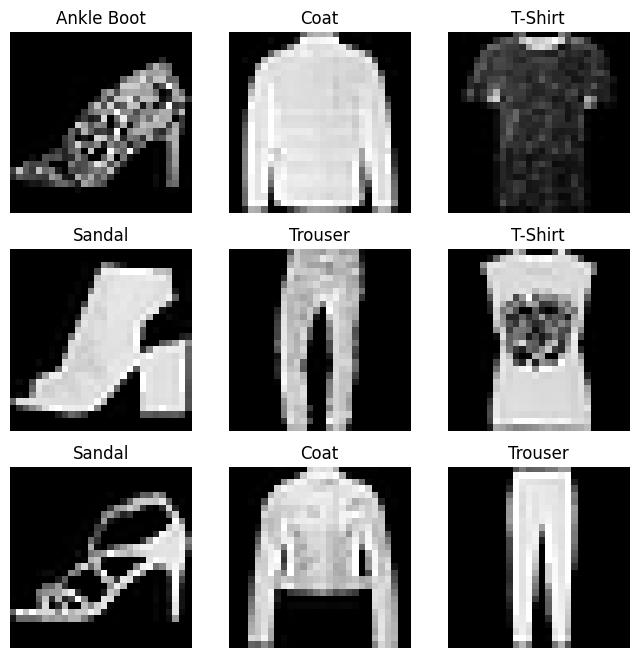

In [2]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

------------------------------------------------------------------------


Creating a Custom Dataset for your files
========================================

A custom Dataset class must implement three functions:
[\_\_init\_\_]{.title-ref}, [\_\_len\_\_]{.title-ref}, and
[\_\_getitem\_\_]{.title-ref}. Take a look at this implementation; the
FashionMNIST images are stored in a directory `img_dir`, and their
labels are stored separately in a CSV file `annotations_file`.

In the next sections, we\'ll break down what\'s happening in each of
these functions.


In [3]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

`__init__`
==========

The \_\_[init](#init__) function is run once when instantiating the
Dataset object. We initialize the directory containing the images, the
annotations file, and both transforms (covered in more detail in the
next section).

The labels.csv file looks like: :

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9


In [4]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

`__len__`
=========

The \_\_[len](#len__) function returns the number of samples in our
dataset.

Example:


In [5]:
def __len__(self):
    return len(self.img_labels)

`__getitem__`
=============

The \_\_[getitem](#getitem__) function loads and returns a sample from
the dataset at the given index `idx`. Based on the index, it identifies
the image\'s location on disk, converts that to a tensor using
`read_image`, retrieves the corresponding label from the csv data in
`self.img_labels`, calls the transform functions on them (if
applicable), and returns the tensor image and corresponding label in a
tuple.


In [6]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

------------------------------------------------------------------------


Preparing your data for training with DataLoaders
=================================================

The `Dataset` retrieves our dataset\'s features and labels one sample at
a time. While training a model, we typically want to pass samples in
\"minibatches\", reshuffle the data at every epoch to reduce model
overfitting, and use Python\'s `multiprocessing` to speed up data
retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an
easy API.


In [7]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Iterate through the DataLoader
==============================

We have loaded that dataset into the `DataLoader` and can iterate
through the dataset as needed. Each iteration below returns a batch of
`train_features` and `train_labels` (containing `batch_size=64` features
and labels respectively). Because we specified `shuffle=True`, after we
iterate over all batches the data is shuffled (for finer-grained control
over the data loading order, take a look at
[Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)).


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


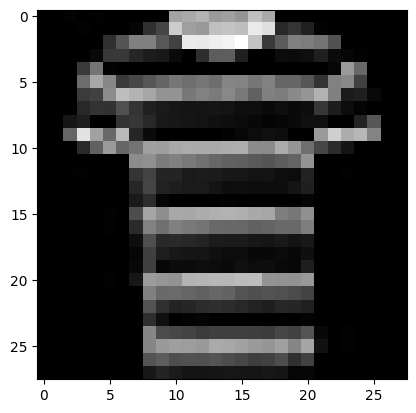

Label: 0


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

------------------------------------------------------------------------


Further Reading
===============

-   [torch.utils.data API](https://pytorch.org/docs/stable/data.html)
